#Import Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Load the Training Dataset**

In [4]:
df = pd.read_csv(r'/content/Google_Stock_Price_Train.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
df.to_string()
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# **Use the open stock price column to train your model**

In [7]:
training_set = df.iloc[:, 1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


# **Normalizing the dataset**

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# **Creating X_train and Y_Train**

In [9]:
X_train = []
Y_train = []
for i in range(60, 1258):
  X_train.append(scaled_training_set[i-60:i,0])
  Y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
print(X_train.shape)
print(Y_train.shape)

(1198, 60)
(1198,)


In [11]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor. add (Dropout (0.2))

regressor. add (LSTM(units = 50, return_sequences= True))
regressor. add (Dropout (0.2))

regressor. add(LSTM(units = 50, return_sequences = True))
regressor. add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))

regressor.add(Dense (units=1))

# **Fitting the Model**

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 88ms/step - loss: 0.0390
Epoch 2/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0059
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0050
Epoch 13/100
38/38 [=

# **Extracting the Actual Stock Prices of Jan-2017.**

In [15]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

# **Preparing the Input for the Model.**

In [16]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range (60,80):
  X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape (X_test, (X_test.shape [0], X_test.shape [1], 1))

# **Predicting the Values for Jan 2017 Stock Prices.**

In [17]:
predicted_stock_price = regressor.predict (X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


# **Plotting the Actual and Predicted Prices for Google Stocks.**

<function matplotlib.pyplot.legend(*args, **kwargs)>

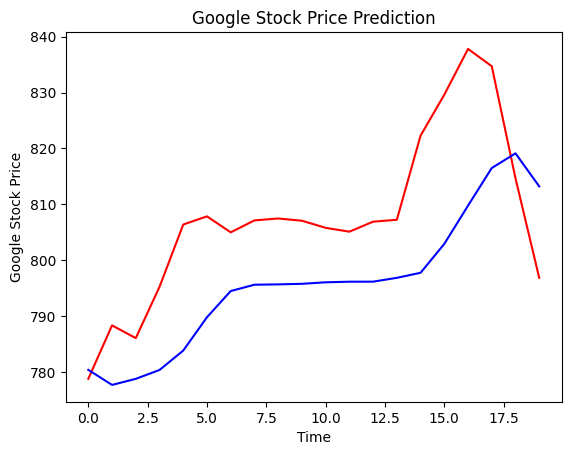

In [18]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel ('Google Stock Price')
plt.legend